[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9600 samples in 0.002s...
[t-SNE] Computed neighbors for 9600 samples in 43.899s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9600
[t-SNE] Computed conditional probabilities for sample 2000 / 9600
[t-SNE] Computed conditional probabilities for sample 3000 / 9600
[t-SNE] Computed conditional probabilities for sample 4000 / 9600
[t-SNE] Computed conditional probabilities for sample 5000 / 9600
[t-SNE] Computed conditional probabilities for sample 6000 / 9600
[t-SNE] Computed conditional probabilities for sample 7000 / 9600
[t-SNE] Computed conditional probabilities for sample 8000 / 9600
[t-SNE] Computed conditional probabilities for sample 9000 / 9600
[t-SNE] Computed conditional probabilities for sample 9600 / 9600
[t-SNE] Mean sigma: 0.336572
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.268875
[t-SNE] KL divergence after 300 iterations: 2.473624
t-SNE done! Time elapsed: 51.965591907

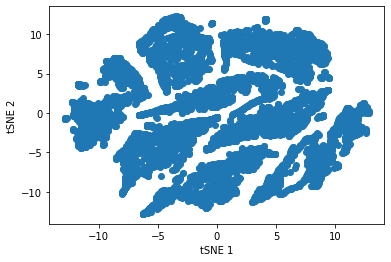

In [3]:
from __future__ import print_function
import time
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
from glob import glob
from joblib import Parallel,delayed
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def baseline_als(y, lam, p, niter=10):
    L = len(y)
    D = sparse.diags([1, -2, 1], [0, -1, -2], shape=(L, L - 2))
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w * y)
        w = p * (y > z) + (1 - p) * (y < z)
    return z

fnames=sorted(glob('/Users/hongwei/Desktop/MachineLearningdata/test_control/*'))
files=[np.loadtxt(f) for f in fnames]
map=[f[:,3] for f in files]
map=[np.reshape(m,(-1,1011)) for m in map]
map_full = np.concatenate([m[:,:] for m in map],axis=0)
y = np.concatenate([np.repeat(i, len(m)) for i, m in enumerate(map)], axis=0)
map_full= savgol_filter(map_full, 11, 3, axis=0)
back = Parallel(n_jobs=8)(delayed(baseline_als)(j, 100000, 0.001) for j in map_full)
map_full= np.subtract(map_full, back)
map_full= np.reshape(map_full, (-1, 1011))
divide=map_full[:,999:1000]
map_full_new=map_full/divide

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1,perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(map_full_new)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
target_ids = range(len(map_full_new))

plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')

colors='grey','cyan','skyblue','mediumorchid','forestgreen','royalblue','deepskyblue','dodgerblue','yellowgreen'

for i, c, label in zip(target_ids, colors, map_full_new):
    plt.scatter(tsne_results[y == i, 0], tsne_results[y == i, 1], c=c, label=label)

plt.show()